# Evaluating linear regressions

**Not all linear regressions are created equal!** And sometimes the things inside of them just _don't make sense_.

In this section we'll discuss what you can do to make sure your regressions are halfway decent, how to pick between them, and whether or not to include particular features.

<p class="reading-options">
  <a class="btn" href="/regression/linear-regression-evaluation">
    <i class="fa fa-sm fa-book"></i>
    Read online
  </a>
  <a class="btn" href="/regression/notebooks/Linear Regression Evaluation.ipynb">
    <i class="fa fa-sm fa-download"></i>
    Download notebook
  </a>
  <a class="btn" href="https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/regression/notebooks/Linear Regression Evaluation.ipynb" target="_new">
    <i class="fa fa-sm fa-laptop"></i>
    Interactive version
  </a>
</p>

## Our dataset

Let's go back to our car crash regression: we're predicting how many crashes a set of very, very terrible drivers get into based on how much they drive.

I went ahead and added a couple other columns to make our regresions a little more interesting.

In [13]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

df = pd.DataFrame([
    {'miles': 2000, 'car_age': 4, 'crashes': 2},
    {'miles': 2000, 'car_age': 2, 'crashes': 0},
    {'miles': 2000, 'car_age': 6, 'crashes': 3},
    {'miles': 5000, 'car_age': 10, 'crashes': 3},
    {'miles': 5000, 'car_age': 3, 'crashes': 6},
    {'miles': 5000, 'car_age': 6, 'crashes': 5}
])

# What effect does the number of miles driven have on the number of crashes?
model = smf.ols(formula='crashes ~ np.divide(miles, 1000)', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     5.786
Date:                Fri, 13 Dec 2019   Prob (F-statistic):             0.0739
Time:                        10:07:56   Log-Likelihood:                -9.8391
No. Observations:                   6   AIC:                             23.68
Df Residuals:                       4   BIC:                             23.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.3333      1.583     -0.211      0.844      -4.729       4.062
np.divide(miles, 1000)     1.0000      0.416      2.405      0.074      -0.154       2.154
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.429
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.708
Skew:                          -0.382   Prob(JB):                        0.702
Kurtosis:                       1.500   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's ask some questions about it.

## Regression quality

The first question we can ask is about **the regression itself.** How good is it?

When you ask how "good" a regression is, you're probably asking **how descriptive it is.** This is explained in the upper right-hand corner, with the **R-squared**  value.

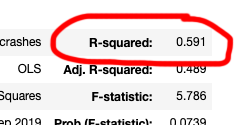


* If our R squared was 1.0, 100% of the change in crashes can be explained by the number of miles
* If our R squared is 0.0, 0% of the change in crashes can be explained by the number of miles

In this case, our R squared is 0.591, which means the number of miles driven counts for about 60% of how many crashes someone gets into. The other 40% can be things like weather, luck, driving skill - other things we aren't measuring here, but which might factor in.

### Comparing regressions

Let's say we ran _another_ regression, taking into account miles driven as well as car age. **Does this new regression do a better job explaining the variation in number of crashes?**

In [19]:
# What effect does the number of miles driven AND the car's age have on the number of crashes?
model = smf.ols(formula='crashes ~ np.divide(miles, 1000) + car_age', data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                crashes   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     2.452
Date:                Fri, 13 Dec 2019   Prob (F-statistic):              0.234
Time:                        11:21:55   Log-Likelihood:                -9.6168
No. Observations:                   6   AIC:                             25.23
Df Residuals:                       3   BIC:                             24.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0159      1.906      0.008      0.994      -6.049       6.080
np.divide(miles, 1000)     1.1111      0.517      2.148      0.121      -0.535       2.757
car_age                   -0.1429      0.297     -0.480      0.664      -1.089       0.804
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.454
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.455
Skew:                          -0.384   Prob(JB):                        0.796
Kurtosis:                       1.890   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If we look at R-squared, the new one has a higher value. This means the **new regression explains more of the variation in crashes**.

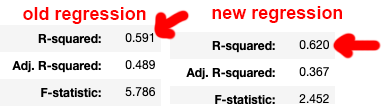

An extra 2 percentage points covered! Amazing! ...except for the fact that **every time you add new parameters to a regression, the R-squared is going to go up.** Every single time. _Every single time_.

This means a regression with a thousand features is going to explain more than one with one feature, _even if the extra features are only explaining random noise_. As a result, no, we can't compare our regressions with R-squared.

We have a few other options to compare regressions, though! And by "a few" I mean "potentially a million."

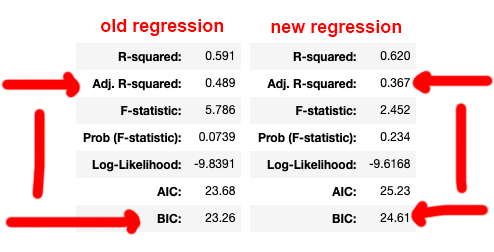

You could use all of these in one way or another, but the one to pay attention to here is **adjusted R-squared.** It's R-squared, but _adjusted for the number of features we're giving the model_. For R-squared, it always goes up if you add new features. For adjusted R-squared, though, it only goes up if the _extra parameters are useful_.

**If adjusted R-squared goes up, we** (probably) **have a better model.**

> "What about the other things in that list? AIC? BIC?" Good question: you can use all the other ones when you talk to someone who knows statistics. We'll talk about **Prob (F-statistic)** a little bit later, down below.

Our adjusted R-squared for the original regresion was 0.489, while our adjusted R-squared for the new regression was 0.367. Since **our adjusted R-squared went down** with the new regression, adding `car_age` didn't actually add anything to our model!

But hey - shouldn't more data always be better data? To figure out what happened, let's look at the **features themselves** instead of the overall model.

## Feature quality

Since we've figured out that adding new features to our model doesn't necessarily improve it, let's take a look at how to measure features. **How can we tell a good and useful feature from a bad one?**

It's easy to get excited about a big coefficient, something that claims to have a nice large effect on our output. But  caution is required:  **features will _always_ have a coefficient, but that doesn't mean that the coefficient is valid.** I can tell you all day every day that my uncle works for Nintendo, but unless he _actually works there_ then it doesn't matter how often I say it.

Let's examine the feature descriptions from the statsmodels output, all those rows down at the bottom. We're interested in `P>|t|`, which is the feature's **p-value**.

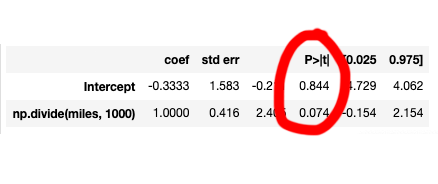

The **p-value** is the most common way to talk about whether a feature (and its coefficient) is meaningful or not. P-values are commonly described as the chance that a result was just a lucky/unlucky accident.

The standard measure of p-value validity is 0.05, which a layman might describe as "we'd get this result accidentally only 5% of the time." It's what people usually mean when they refer to **statistical significance**.

> Note: [P-values have plenty of flaws](https://fivethirtyeight.com/features/science-isnt-broken/) and the "accidental results" description isn't really the most rigorous, but we're going to live with it.

If we look at the p-value for our miles, it's 0.074, which does **NOT MEET THE 0.05 THRESHOLD FOR STATISTICAL SIGNIFICANCE!!!** It's saying there's a 7.4% chance of this just being an accident, as opposed to under a 5% chance. Horrifying, terrifying, really.

...horrifying except for the fact that 0.05 is a completely arbitrary (yet well-accepted) measure, and sometimes people even use 0.1 (10%) or even 0.01 (1%) instead! So depending on how we're feeling when we wake up in the morning, we can totally feel free to use this. See the 'discussion topics' section for a bit more on this topic.

> Our data is very small and very fake, so let's not stress out too much here.

## Change in p-values

Let's step back to our **two different regression**, one that was just miles and one that was miles _and_ the age of the car. When we compare the outputs, the p value for miles changed dramatically between the old and new regressions.

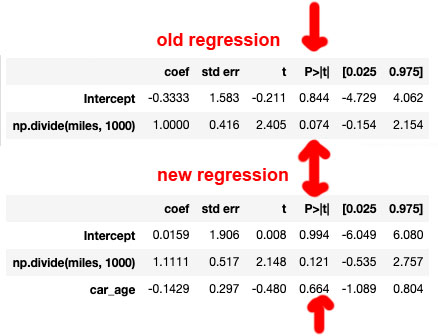

The p-value for `miles` jumped from 0.074 to 0.121 when we moved to the new regression, and the car's age came in at a mind-boggling-high 0.664 (67%)! Remember: **higher p-values are worse**, they're a greater chance that the relationship to the output (the number of crashes) is just an accident.

Even if we're feeling gracious about miles, there's _no way_ we can believe the car's age has anything to do with the number of crashes with its 0.664 p-value. Exposed! Car age's uncle does _not_ work for Nintendo.

It's important to note that adding car age wasn't just useless, either: **by including the car's age in our regression we negatively impacted the p-value of miles driven**, almost doubling it! It might be tempting to add in a million and one features to make your regression "more informed," but we can see from this example that **useless features just confuse the regression.** Because our regression also had to take into account the car's age, it couldn't listen to `miles` as much as it should have.

As a result of adding `car_age`, the adjusted R-squared dropped and p-values went crazy. Bad regression!

> Picking what features to use - "feature selection" - is a big and complicated part of machine learning. If you generally stick to only adding features that make sense and removing ones that have high p-values, you'll probably be in a good place when you present your findings to a stats person to review.

## Regression p values

It isn't just our features that have p-values - **the overall regression gets a p-value, too!** This is where people who publish papers will get up on a cardboard box and exclaim _"MY RESULTS ARE STATISTICALLY SIGNIFICANT!"_

You can find the p-value for the entire regression in the top left, listed as **Prob (F-statistic)**. Here is the p-value for our first regression:

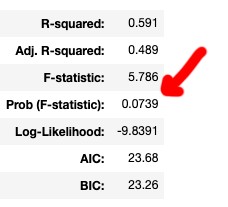

In our original regression, the p-value for our overall regression is actually the same as it was for our `miles` feature, about 0.074. We can compare this p-value to the regression that included the car age:

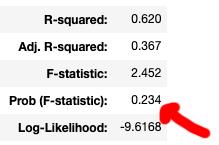

Another point that shows how bad that second regression was! The p-value jumped from 0.074 to 0.234 - even if that regression had the most exciting coefficients in the world, a 0.234 p-value is way way way too high. In no universe could it be considered statistically significant, sorry!

Note that **you won't use p-values to choose between models**. You'll just use a p-value to determine whether the linear regression model meets your standard of statistical significance. If it doesn't, throw it out!

## Review

In this section, we talked about **evaluating both models and features.**

For a linear regression model, the **R-squared** can be used to see how much of the output is described by the regression. Every time you add features, though, the R-squared will go up! To compare models with different numbers of features you'll need to use **adjusted r-squared**. Adjusted R-squared is smart enough to take into account how many features there are.

When evaluating individual features, you're typically interested in a **p-value** that's less than 0.05. **Removing bad features can improve your model**, as your regression can start paying attention to the things that matter. More data isn't necessarily better!

Models also have p values that determine whether the result can be considered **"statistically significant."** You won't use them to decide between models, but they're important in evaluating whether you can trust a model.

## Discussion topics

TODO